# Gradient Descent/Ascent

0. Fonksiyonun bir optimum noktasının olup olmadığını Hessian kullanarak kontrol et
    1. $\lvert H \rvert = \frac{\partial^2 f}{\partial x^2}\frac{\partial^2 f}{\partial y^2} - \left(\frac{\partial^2 f}{\partial x \partial y}\right)^2$
    2.  $\lvert H \rvert > 0$ ise optimum var aksi durumda eğer noktası
        1. $\frac{\partial^2 f}{\partial x^2} > 0$ ise aranan nokta bir minimum
        2. $\frac{\partial^2 f}{\partial x^2} < 0$ ise aranan nokta bir maximum
1. Bir başlangıç noktası seç ($x_0$)
2. $∇f(x_k)$ gradyan değerini hesaplayarak arama yönünü bul ($k$ burada tekrar indisi)
3. Gradyanı minimum için negatif, maximum için pozitif olarak kullan
4. Arama yönünde yeni noktayı bul: $x_{k+1}=x_k+\alpha_k∓∇f(x_k)$ 
5. $\alpha_k$ (adım büyüklüğü) değerini hesaplamak için tek değişkenli optimizasyondan faydalan

In [1]:
%reset -f
import numpy as np
import sympy as sp
import pandas as pd

out=[]
out.clear()

r=3 # sonuçları yuvarlaman için
j=1 # tekrarları sayman için

In [2]:
#başlangıç değerleri
#V=np.array([.5,1])
V=np.array([0.5,1])

x,y,h=sp.symbols('x y h')
#axy+by-cxx-dyy
#a,b,c,d=1.76,2.28,3.41,4.53
a,b,c,d=1.76,1.28,2.41,0.53
cxx,cx,cxy,cy,cyy=c,0,a,b,d
#cxx,cx,cxy,cy,cyy=-1,2,2,0,-2
f = cxx*x**2+cx*x+cxy*x*y+cy*y+cyy*y**2
f

2.41*x**2 + 1.76*x*y + 0.53*y**2 + 1.28*y

In [3]:
# hessian değerini hesapla ve optimumluğu kontrol et
d2x=sp.diff(f,x,2)
H=d2x*sp.diff(f,y,2)-(sp.diff(sp.diff(f,x),y))**2
if H>0:
    if d2x>0: 
        op='min'
        print('Hessian: %.2f ve d2f/dx2: %.2f. Minimum noktası var'%(H,d2x))
    else: 
        print('Hessian: %.2f ve d2f/dx2: %.2f. Maximum noktası var'%(H,d2x))
        op='max'

Hessian: 2.01 ve d2f/dx2: 4.82. Minimum noktası var


### Gradyan

In [4]:
dfx=sp.diff(f,x)
dfx

4.82*x + 1.76*y

In [5]:
dfy=sp.diff(f,y)
dfy

1.76*x + 1.06*y + 1.28

### Nokta değerlerini yerine yazarak adım yönünü hesapla

In [6]:
'''Tekrarları buradan başlat!''';

In [40]:
Gr=np.around(np.array([dfx.subs({x:V[0],y:V[1]}).evalf(),dfy.subs({x:V[0],y:V[1]}).evalf()]).astype(np.float),r)
Gr

array([-0.409,  0.528])

### h cinsinden yeni $x$ ve $y$ değerleri:

In [41]:
# (x_h, y_h)
if op=='min':
    xh=V[0]-Gr[0]*h
    yh=V[1]-Gr[1]*h
elif op=='max':
    xh=V[0]+Gr[0]*h
    yh=V[1]+Gr[1]*h
xh=np.around(np.array(sp.Poly(xh,h).evalf().all_coeffs()).astype(np.float),r)
yh=np.around(np.array(sp.Poly(yh,h).evalf().all_coeffs()).astype(np.float),r)
xh=sp.Poly(xh,h).as_expr()
yh=sp.Poly(yh,h).as_expr()

### $g(h)$ terimlerinin hesaplanması
1. katsayılar ile işleme girmeden önce $x$, $y$, $xy$, $x^2$ ve $y^2$ terimleri:

In [42]:
p=[]
p.clear()
fxy=np.around(np.array(sp.Poly(xh*yh,h).evalf().all_coeffs()).astype(np.float),r)
fxx=np.around(np.array(sp.Poly(xh*xh,h).evalf().all_coeffs()).astype(np.float),r)
fyy=np.around(np.array(sp.Poly(yh*yh,h).evalf().all_coeffs()).astype(np.float),r)

p.append([xh,
          yh,
          sp.Poly(fxy,h).as_expr(),
          sp.Poly(fxx,h).as_expr(),
          sp.Poly(fyy,h).as_expr()])

pd.DataFrame(p, columns = ['x','y','xy','xx','yy']).style.hide_index()

x,y,xy,xx,yy
0.409*h + 0.442,-0.528*h - 1.443,-0.216*h**2 - 0.824*h - 0.638,0.167*h**2 + 0.362*h + 0.195,0.279*h**2 + 1.524*h + 2.082


2. katsayılar ile çarpıldıktan sonra $x$, $y$, $xy$, $x^2$ ve $y^2$ terimleri:

In [43]:
p.clear()
fcx=np.around(np.array(sp.Poly(cx*xh,h).evalf().all_coeffs()).astype(np.float),r)
fcy=np.around(np.array(sp.Poly(cy*yh,h).evalf().all_coeffs()).astype(np.float),r)
fcxy=np.around(np.array(sp.Poly(xh*yh*cxy,h).evalf().all_coeffs()).astype(np.float),r)
fcxx=np.around(np.array(sp.Poly(xh*xh*cxx,h).evalf().all_coeffs()).astype(np.float),r)
fcyy=np.around(np.array(sp.Poly(yh*yh*cyy,h).evalf().all_coeffs()).astype(np.float),r)

p.append([sp.Poly(fcx,h).as_expr(),
         sp.Poly(fcy,h).as_expr(),
         sp.Poly(fcxy,h).as_expr(),
         sp.Poly(fcxx,h).as_expr(),
         sp.Poly(fcyy,h).as_expr()])

pd.DataFrame(p, columns = ['cx','cy','cxy','cxx','cyy']).style.hide_index()

cx,cy,cxy,cxx,cyy
0,-0.676*h - 1.847,-0.38*h**2 - 1.449*h - 1.123,0.403*h**2 + 0.871*h + 0.471,0.148*h**2 + 0.808*h + 1.104


### $g(h)$ fonksiyonu

In [44]:
g=np.around(np.array(sp.Poly(p[0][0]+p[0][1]+p[0][2]+p[0][3]+p[0][4],h).evalf().all_coeffs()).astype(np.float),r)
g=sp.Poly(g,h).as_expr()
g

0.171*h**2 - 0.446*h - 1.395

## $\frac{d g(h)}{d h}$ :

In [45]:
dg=np.around(np.array(sp.Poly(sp.diff(g,h),h).evalf().all_coeffs()).astype(np.float),r)
dg=sp.Poly(dg,h).as_expr()
dg

0.342*h - 0.446

### $Dg_h=0$ için optimal $h$ değeri

In [46]:
oph=sp.solve(dg,h)[0].evalf().round(r)
oph

1.304

### Optimum nokta (x,y)

In [47]:
xx,yy=xh.subs({h:oph}).round(r),yh.subs({h:oph}).round(r)
xx,yy

(0.975, -2.132)

### $f(x,y)$ optimum değeri

In [48]:
opf=f.subs({x:xx,y:yy}).round(r)
opg=g.subs({h:oph}).round(r)

In [49]:
out.append([j,V[0],V[1],Gr[0],Gr[1],g,dg,oph,opf,opg,xx,yy])
j=j+1
pd.DataFrame(out, columns = ['Adım','x0','y0','Grx','Gry','g','dg','oph','opf','opg','x1','y1']).style.hide_index().set_precision(3)

Adım,x0,y0,Grx,Gry,g,dg,oph,opf,opg,x1,y1
1,0.500,1.000,4.170,3.220,71.034*h**2 - 27.758*h + 3.292,142.068*h - 27.758,0.195,0.581,0.580,-0.313,0.372
2,-0.313,0.372,-0.854,1.123,0.738*h**2 - 1.99*h + 0.58,1.476*h - 1.99,1.348,-0.762,-0.761,0.838,-1.142
3,0.838,-1.142,2.029,1.544,16.699*h**2 - 6.501*h - 0.763,33.398*h - 6.501,0.195,-1.395,-1.396,0.442,-1.443
4,0.442,-1.443,-0.409,0.528,0.171*h**2 - 0.446*h - 1.395,0.342*h - 0.446,1.304,-1.687,-1.686,0.975,-2.132


In [50]:
V=np.array([xx,yy])

# Doğrulama

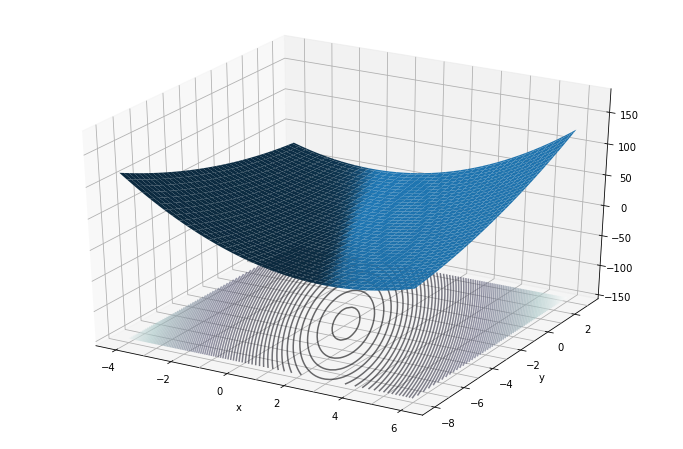

In [148]:

a,b,c,d=1.76,1.28,-2.41,-0.53
def f(x,y): return a*x*y+b*y-c*x**2-d*y**2

# fonksiyonun görselleştirilmesi
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12,8)
i=np.linspace(-4, 6, 80)
j=np.linspace(-8, 3, 80)
X,Y=np.meshgrid(i, j)
Z=f(X,Y)
ax=plt.axes(projection='3d')

ax.set_xticks(np.arange(-100, 100, 1), minor=True)
ax.set_yticks(np.arange(-100, 100, 1), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major')

ax.plot_surface(X, Y, Z)
ax.contour(X, Y, Z, 100, zdir='z', offset=-150, cmap='bone', alpha=0.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlim(-150,180)
plt.show()
